In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Minor_Project/Data/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Minor_Project/Data/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [ ]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer (4 classes)
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Epoch 1/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 91s 5s/step - accuracy: 0.4917 - loss: 8.7832 - val_accuracy: 0.1875 - val_loss: 6.2634
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.3125 - loss: 15.5530 - val_accuracy: 0.3750 - val_loss: 4.9072
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.4635 - loss: 8.3398 - val_accuracy: 0.2344 - val_loss: 4.4303
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5000 - loss: 2.2150 - val_accuracy: 0.0000e+00 - val_loss: 5.7611
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 137s 5s/step - accuracy: 0.4967 - loss: 3.5131 - val_accuracy: 0.3281 - val_loss: 3.7687
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5000 - loss: 3.5362 - val_accuracy: 0.2500 - val_loss: 4.4088
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 138s 5s/step - accuracy: 0.4510 - loss: 2.0964 - val_accuracy: 0.3438 - val_loss: 5.8284
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5312 - loss: 2.4349 - val_accuracy: 0.1250

In [ ]:
# Modify the target size of ImageDataGenerator and input shape in the model
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Minor_Project/Data/train',
    target_size=(400, 200),  # Adjust the target size
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Minor_Project/Data/valid',
    target_size=(400, 200),  # Adjust the target size
    batch_size=32,
    class_mode='categorical'
)

# Update the input shape in the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(400, 200, 3), activation='relu'))  # Update input shape
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(64, (3, 3), input_shape=(400, 200, 3), activation='relu'))  # Increased filters
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Second Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Third Convolutional Layer
model.add(Conv2D(256, (3, 3), activation='relu'))  # Increased filters
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Fourth Convolutional Layer (optional for more depth)
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load the pre-trained ResNet50 model without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(400, 200, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for classification
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)  # Use .keras extension

model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 238s 12s/step - accuracy: 0.2848 - loss: 1.5515 - val_accuracy: 0.3281 - val_loss: 1.3827
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 126ms/step - accuracy: 0.2188 - loss: 1.4638 - val_accuracy: 0.2500 - val_loss: 1.4929
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 246s 11s/step - accuracy: 0.3167 - loss: 1.4061 - val_accuracy: 0.3125 - val_loss: 1.3579
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.1875 - loss: 1.4734 - val_accuracy: 0.1250 - val_loss: 1.4205
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 248s 11s/step - accuracy: 0.3291 - loss: 1.3934 - val_accuracy: 0.4531 - val_loss: 1.2704
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 477ms/step - accuracy: 0.2188 - loss: 1.3915 - val_accuracy: 0.2500 - val_loss: 1.3848
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 243s 11s/step - accuracy: 0.3241 - loss: 1.3382 - val_accuracy: 0.5625 - val_loss: 1.2594
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 120ms/step - accuracy: 0.4375 - loss: 1.3134 - val_accuracy

In [ ]:
   # Test dataset generator (without augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Minor_Project/Data/test',
    target_size=(400, 200),  # Same target size as training
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 315 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

# Define the input shape
inputs = tf.keras.Input(shape=(400, 200, 3))  # Assuming RGB images of size 400x200

# Example CNN layers
x = Conv2D(32, (3, 3), activation='relu')(inputs)  # Convolution layer with 32 filters
x = MaxPooling2D(pool_size=(2, 2))(x)  # Max pooling layer

x = Conv2D(64, (3, 3), activation='relu')(x)  # Another convolution layer
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu')(x)  # Another convolution layer
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten the output from the convolutional layers
x = Flatten()(x)

# Fully connected layers
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout for regularization

# Output layer (adjust the number of units to match the number of classes)
num_classes = 4  # Assuming 4 classes in your dataset
outputs = Dense(num_classes, activation='softmax')(x)

# Build the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 400, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 398, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 199, 99, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 197, 97, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 98, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 96, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 48, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 141312)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      36,176,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,270,404 (138.36 MB)

 Trainable params: 36,270,404 (138.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,  # Number of steps per epoch (adjust as necessary)
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[model_checkpoint, early_stopping]
)

Epoch 1/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 156s 8s/step - accuracy: 0.2573 - loss: 2.7797 - val_accuracy: 0.3281 - val_loss: 1.3297
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 368ms/step - accuracy: 0.2500 - loss: 1.4032 - val_accuracy: 0.3750 - val_loss: 1.3032
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 141s 7s/step - accuracy: 0.3659 - loss: 1.2764 - val_accuracy: 0.4531 - val_loss: 1.2179
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 338ms/step - accuracy: 0.6250 - loss: 1.0509 - val_accuracy: 0.7500 - val_loss: 0.9584
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 188s 7s/step - accuracy: 0.4701 - loss: 1.0782 - val_accuracy: 0.5000 - val_loss: 1.0618
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 599ms/step - accuracy: 0.4375 - loss: 1.0302 - val_accuracy: 0.3750 - val_loss: 1.0919
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 141s 7s/step - accuracy: 0.5052 - loss: 1.0330 - val_accuracy: 0.4219 - val_loss: 1.2234
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 519ms/step - accuracy: 0.5938 - loss: 1.3490 - val_accuracy: 0.

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 92s 10s/step - accuracy: 0.6545 - loss: 0.9485
Test Loss: 1.0474001169204712, Test Accuracy: 0.5047619342803955


10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step


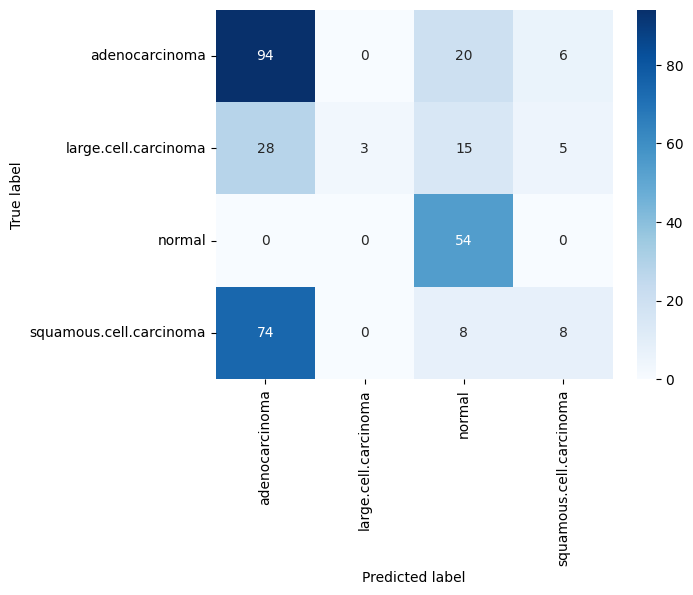

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get true and predicted classes
true_classes = test_generator.classes
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

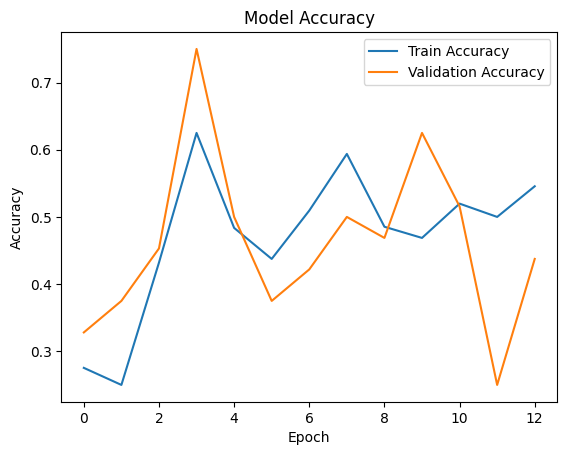

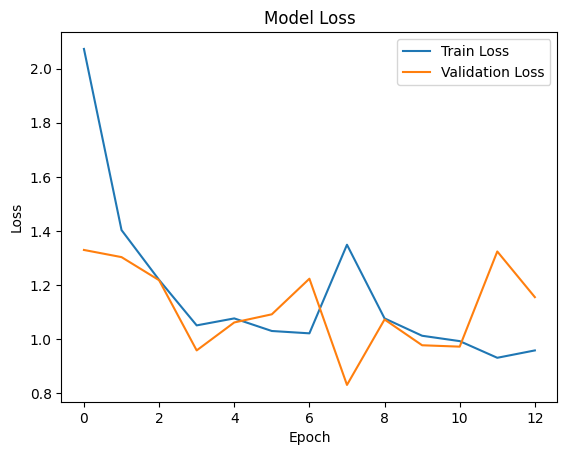

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()